# Lending Club Default Analysis

# Importing Libraries

In [49]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Sourcing and Understanding

In [50]:
df = pd.read_csv('loan.csv', low_memory=False)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [52]:
df.shape

(39717, 111)

In [53]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [54]:
df.notnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39713,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39714,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39715,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [56]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [57]:
round(100*(df.isnull().sum()/len(df.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [58]:
null_percentage = df.isnull().sum()/df.shape[0]*100

In [59]:
print(null_percentage)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


In [60]:
col_to_drop = null_percentage[null_percentage>60].keys()

In [61]:
df = df.drop(col_to_drop, axis=1)

In [62]:
df.shape

(39717, 54)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [64]:
df = df.drop(['url','id','member_id','desc','zip_code','emp_title'],axis=1)

In [65]:
df.shape

(39717, 48)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [67]:
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

# removing unique values columns

In [68]:
df = df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis=1)

In [69]:
df.shape

(39717, 39)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [71]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


# fixing column types

In [72]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [73]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [74]:
df = df[~df['emp_length'].isnull()]
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [75]:
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: object

In [76]:
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38642 non-null  int64  
 1   funded_amnt              38642 non-null  int64  
 2   funded_amnt_inv          38642 non-null  float64
 3   term                     38642 non-null  object 
 4   int_rate                 38642 non-null  float64
 5   installment              38642 non-null  float64
 6   grade                    38642 non-null  object 
 7   sub_grade                38642 non-null  object 
 8   emp_length               38642 non-null  int64  
 9   home_ownership           38642 non-null  object 
 10  annual_inc               38642 non-null  float64
 11  verification_status      38642 non-null  object 
 12  issue_d                  38642 non-null  object 
 13  loan_status              38642 non-null  object 
 14  purpose               

In [78]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  issue_d                  37544 non-null  object 
 13  loan_status              37544 non-null  object 
 14  purpose               

In [80]:
Other_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]
Other_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [82]:
df = df.drop(Other_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  int64  
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  object 
 14  purpose               37544 non-null  object 
 15  title              

In [83]:
df.nunique().sort_values()

loan_status                 2
term                        2
pub_rec_bankruptcies        3
verification_status         3
home_ownership              5
grade                       7
emp_length                 10
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  370
loan_amnt                 866
funded_amnt              1016
dti                      2848
annual_inc               5006
funded_amnt_inv          7945
installment             14801
title                   18848
dtype: int64

In [84]:
# converting status to numerical value for plotting
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [85]:
df['loan_status']

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 37544, dtype: int64

# univariate analysis

<AxesSubplot:>

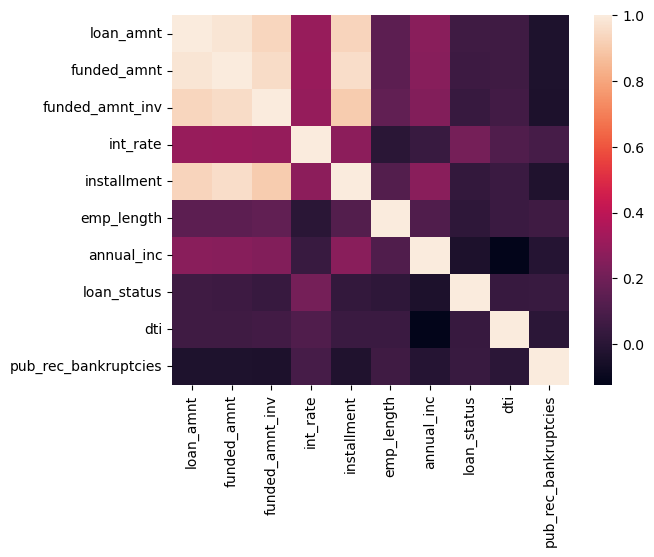

In [86]:
sns.heatmap(df.corr())
# loan amount has high correlation with funded amount and interest rate
# funded  amount has hgh correlation with loan amount and interest rate
# loan amount has high correlation with funded amount_inv

<AxesSubplot:xlabel='loan_status', ylabel='count'>

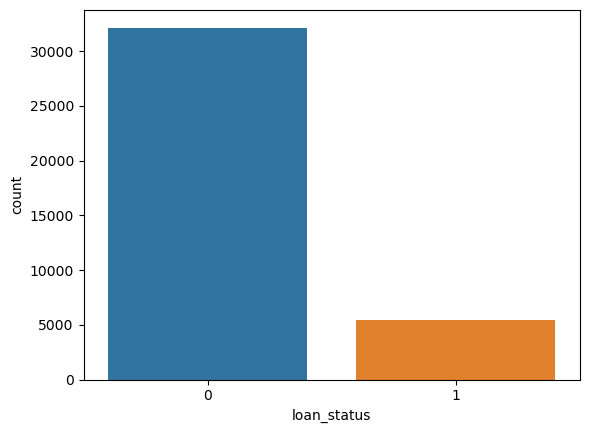

In [87]:
sns.countplot(df['loan_status'])

In [88]:
df.shape

(37544, 19)

In [89]:
df['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

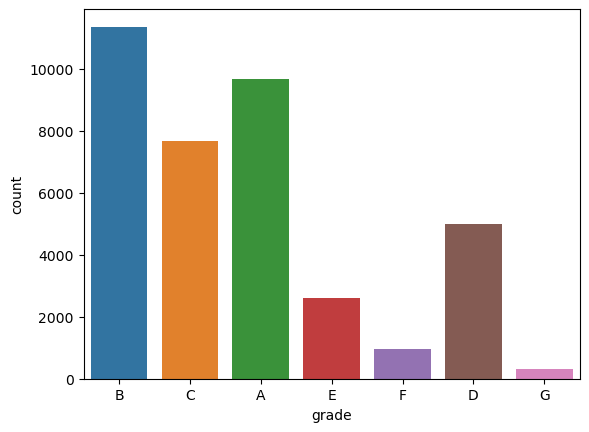

In [90]:
sns.countplot(df['grade'])

In [91]:
df['loan_amnt']

0         5000
1         2500
2         2400
3        10000
5         5000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 37544, dtype: int64

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

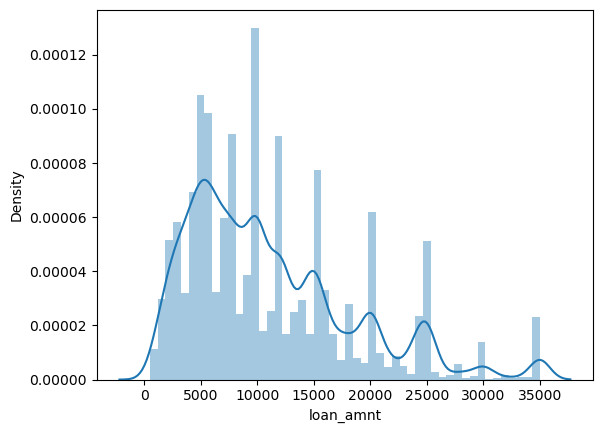

In [92]:
sns.distplot(df['loan_amnt'])
# highest amount of people got loan around 5000

<AxesSubplot:xlabel='loan_amnt'>

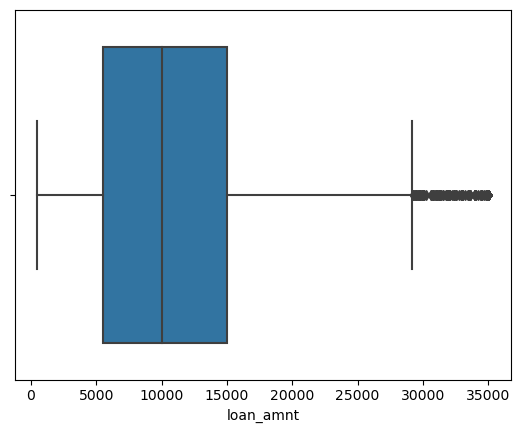

In [93]:
sns.boxplot(df['loan_amnt'])

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

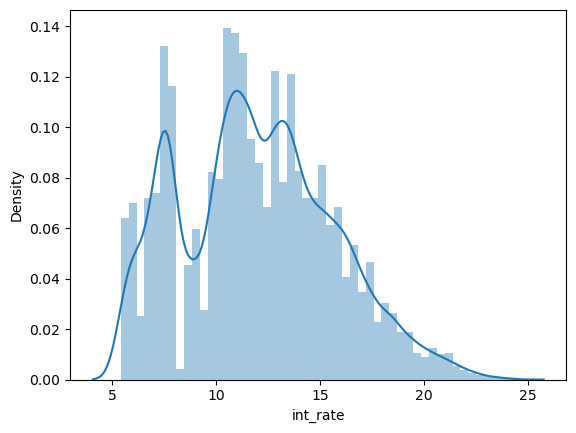

In [94]:
sns.distplot(df['int_rate'])

<AxesSubplot:xlabel='int_rate'>

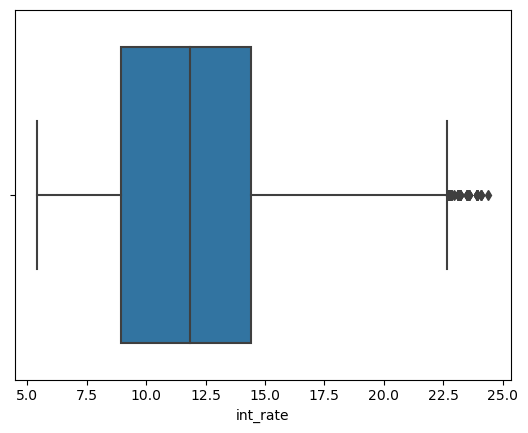

In [95]:
sns.boxplot(df['int_rate'])

# Bivariate analysis

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

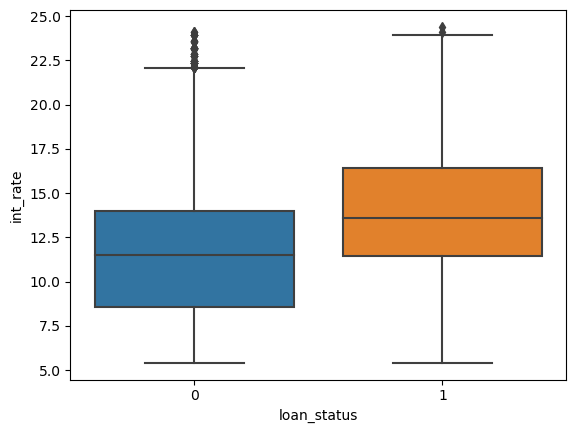

In [96]:
#Analyze the relationship between loan status and int_rate
sns.boxplot(x = 'loan_status', y = 'int_rate' ,data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

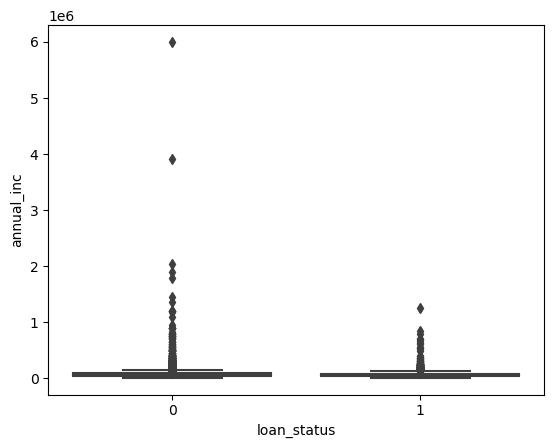

In [97]:
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=df)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

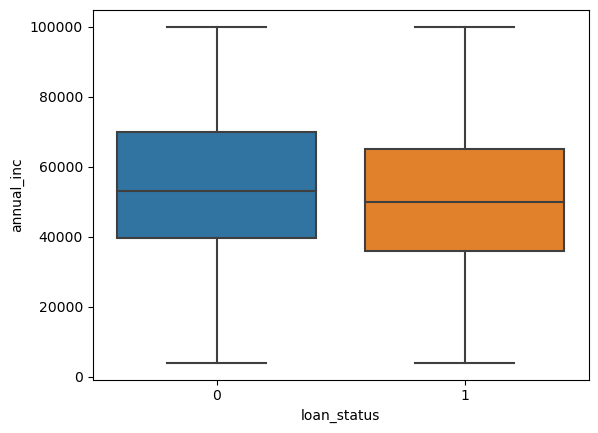

In [98]:
temp = df[df['annual_inc'] < 100000]
#Analyze the relationship between loan status and salary
sns.boxplot(x = 'loan_status', y = 'annual_inc' ,data=temp)

In [99]:
round(np.mean(df['loan_status']), 2)

0.14

In [100]:
a = df[df['grade']=='A']
a['loan_status'].value_counts()

0    9102
1     558
Name: loan_status, dtype: int64

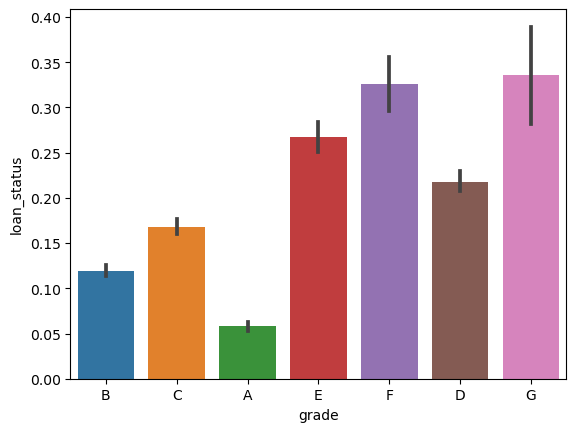

In [101]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [104]:
def plt_categorical(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()
    

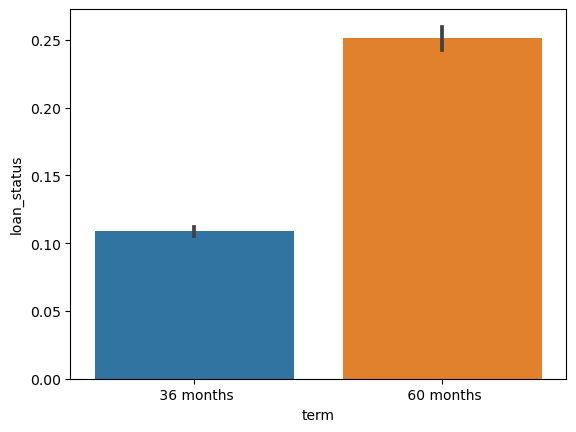

In [105]:
plt_categorical('term')

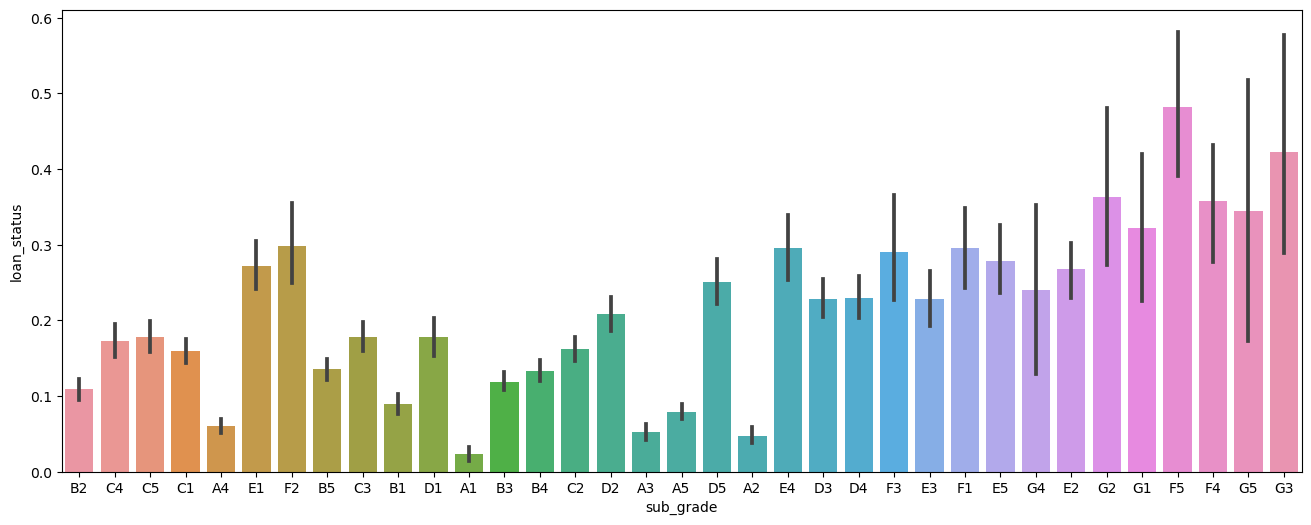

In [106]:
plt.figure(figsize=(16, 6))
plt_categorical('sub_grade')

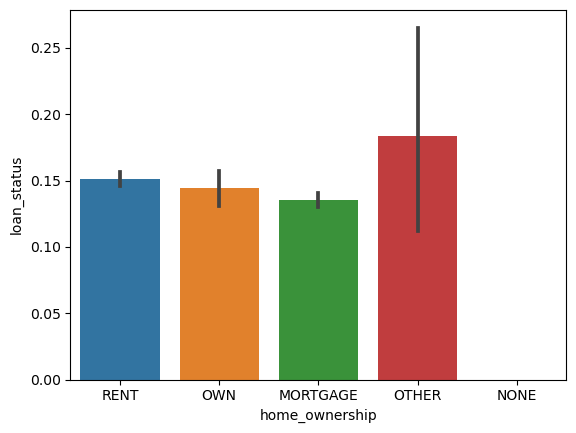

In [107]:
plt_categorical('home_ownership')

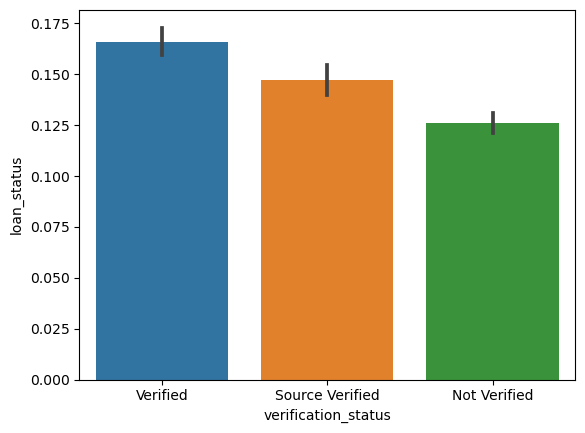

In [108]:
# verification_status: surprisingly, verified loans default more than not verifiedb
plt_categorical('verification_status')

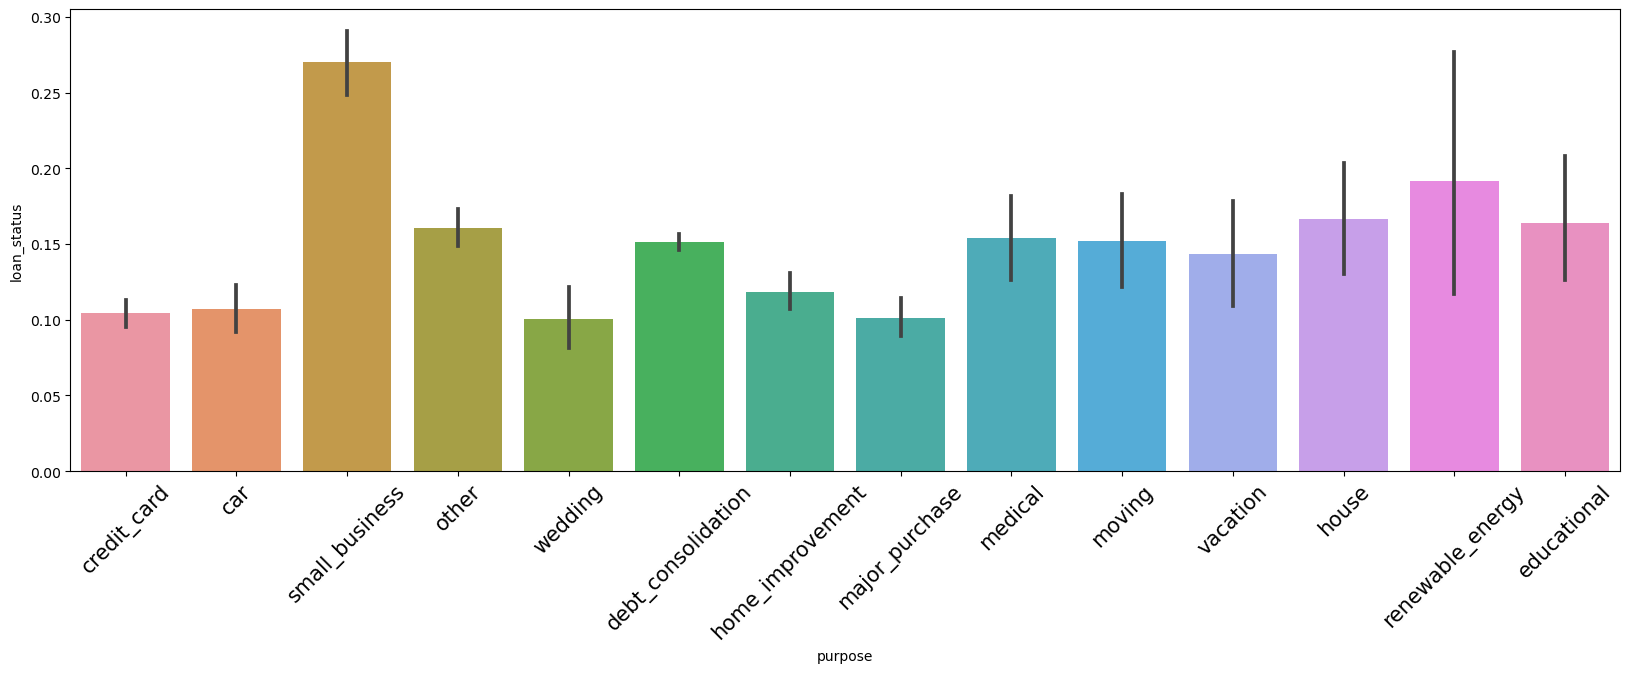

In [109]:
plt.figure(figsize=(20, 6))
plt.tick_params(axis='x', labelrotation=45,labelsize=15)
plt_categorical('purpose')

In [110]:
# let's also observe the distribution of loans across years
# first lets convert the year column into datetime and then extract year and month from it
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [111]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [112]:
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [113]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [114]:
df['month']

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: month, Length: 37544, dtype: int64

In [115]:
df['year']

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 37544, dtype: int64

In [116]:
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [117]:
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

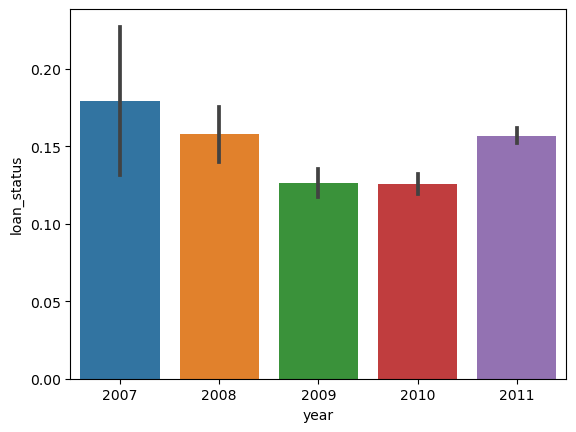

In [119]:
# lets compare the default rates across years
# the default rate had suddenly increased in 2011, inspite of reducing from 2008 till 2010
plt_categorical('year')

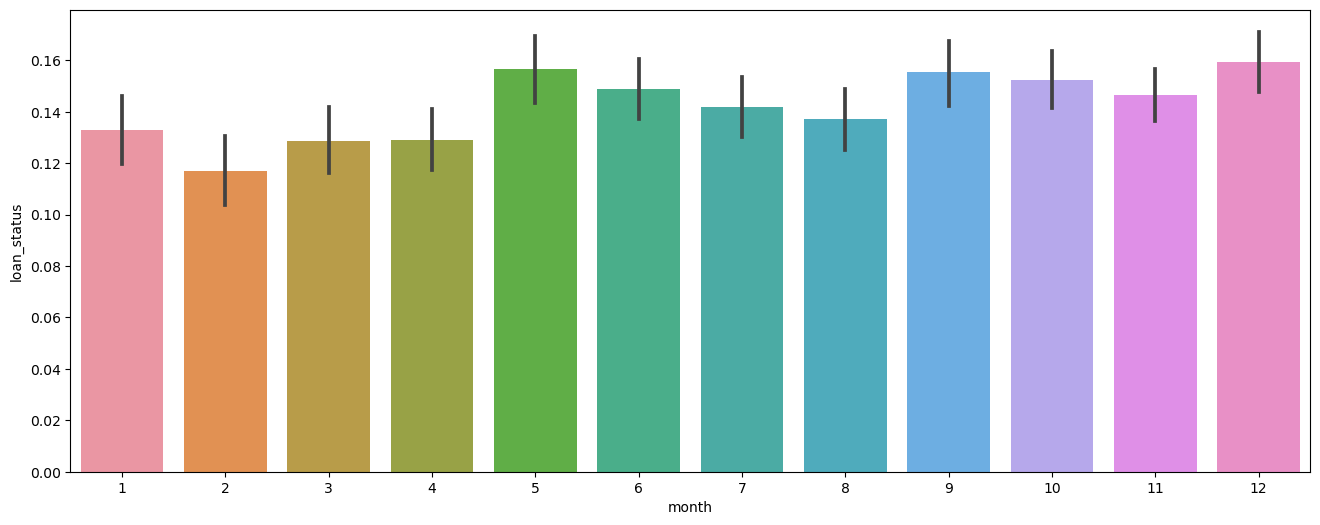

In [120]:
plt.figure(figsize=(16, 6))
plt_categorical('month')

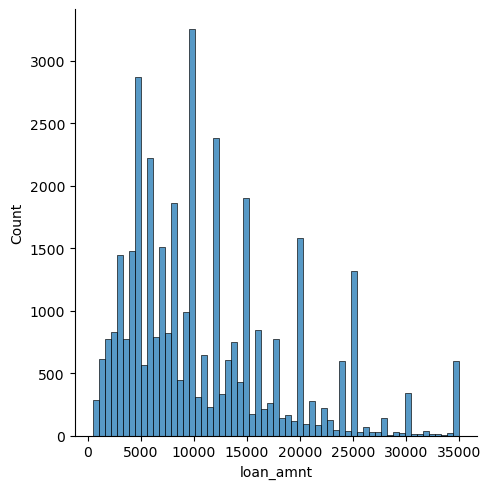

In [121]:
# loan amount: the median loan amount is around 10,000
sns.displot(df['loan_amnt'])
plt.show()

In [122]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [123]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

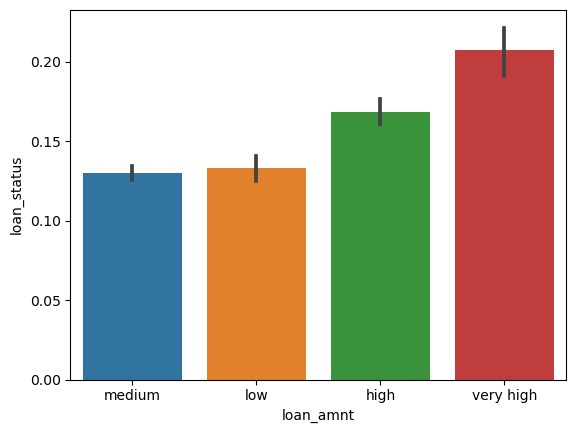

In [124]:
plt_categorical('loan_amnt')

In [125]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

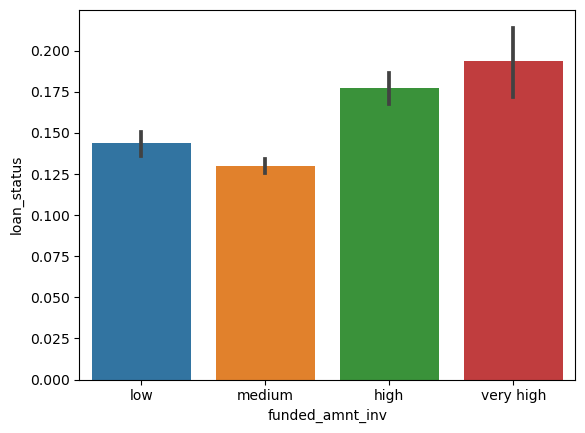

In [126]:
# funded amount invested
plt_categorical('funded_amnt_inv')

In [127]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

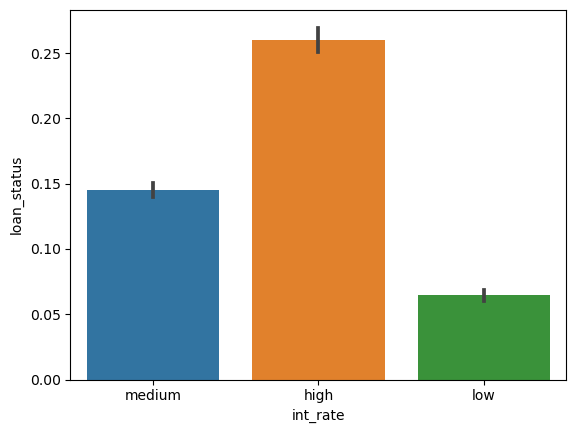

In [128]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
plt_categorical('int_rate')

In [129]:
df['dti']

0        27.65
1         1.00
2         8.72
3        20.00
5        11.20
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 37544, dtype: float64

In [130]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

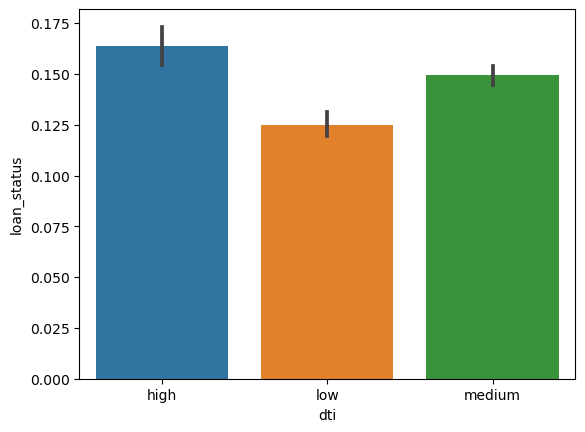

In [133]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
plt_categorical('dti')

In [134]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

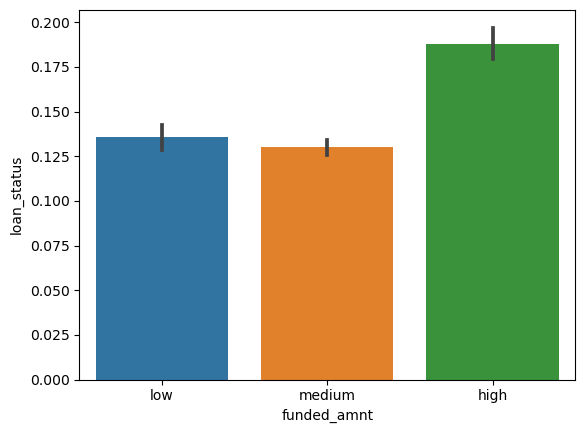

In [135]:
plt_categorical('funded_amnt')

In [136]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

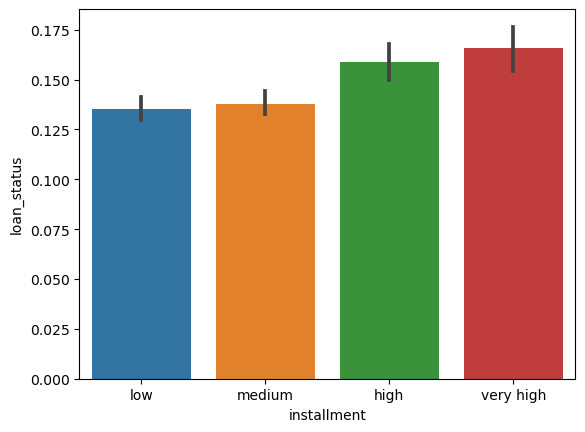

In [137]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plt_categorical('installment')

In [138]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

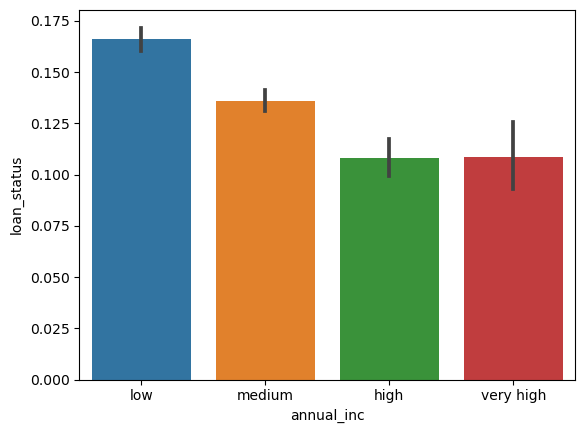

In [139]:
# annual income and default rate
# lower the annual income, higher the default rate
plt_categorical('annual_inc')

In [140]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

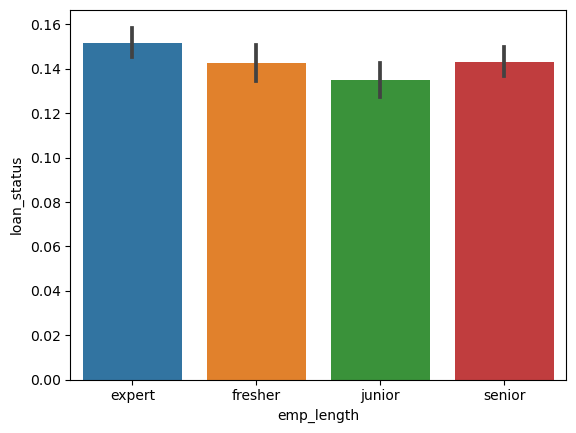

In [141]:
# emp_length and default rate
# not much of a predictor of default
plt_categorical('emp_length')

# Segmented univaraite analysis

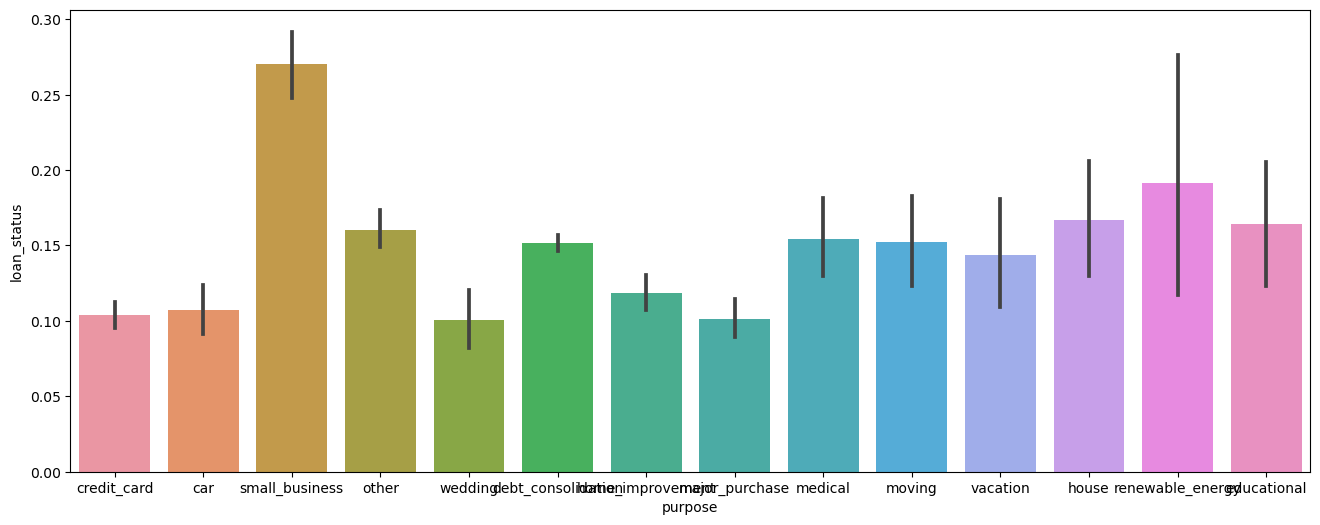

In [142]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plt_categorical('purpose')

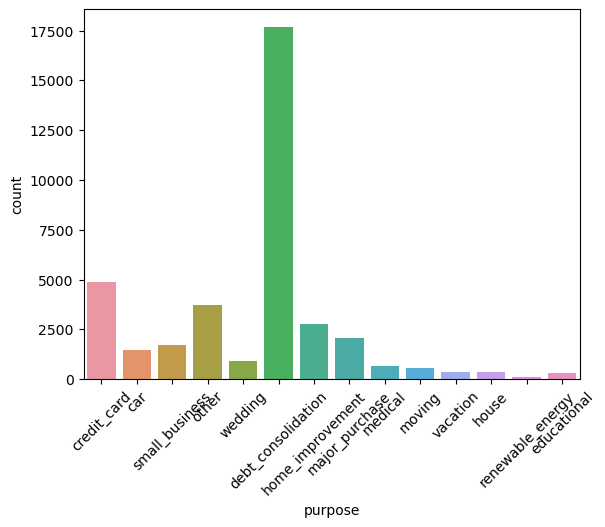

In [143]:
#plt.figure(figsize=(16, 6))
plt.tick_params(axis='x', labelrotation=45)
sns.countplot(x='purpose', data=df)
plt.show()

In [144]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

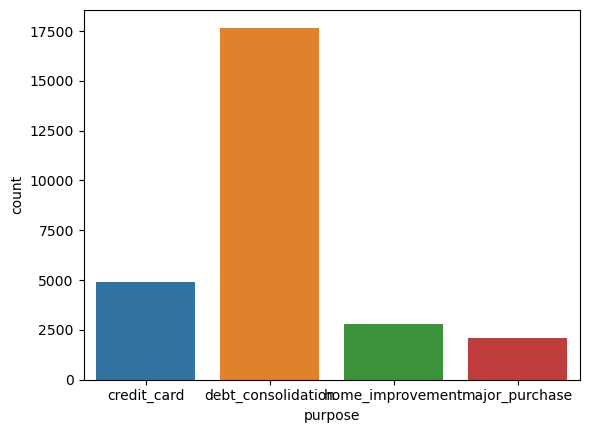

In [145]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

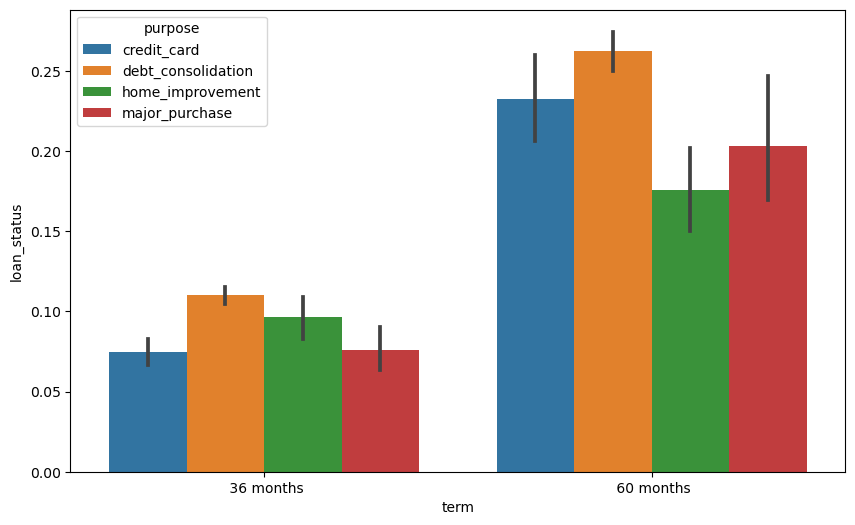

In [146]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

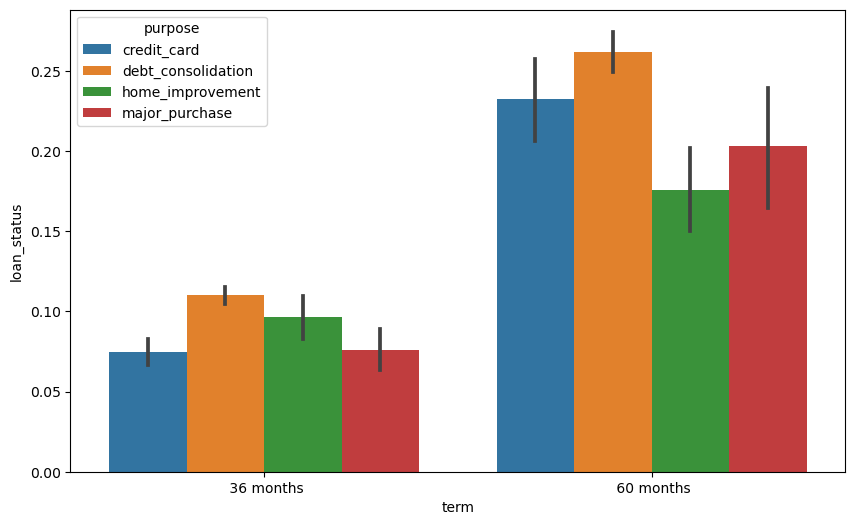

In [147]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

    
plot_segmented('term')

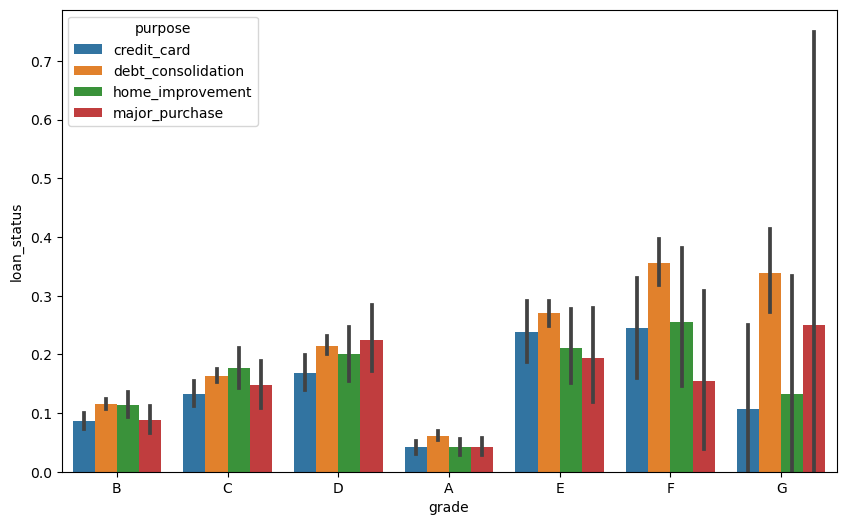

In [148]:
# grade of loan
plot_segmented('grade')

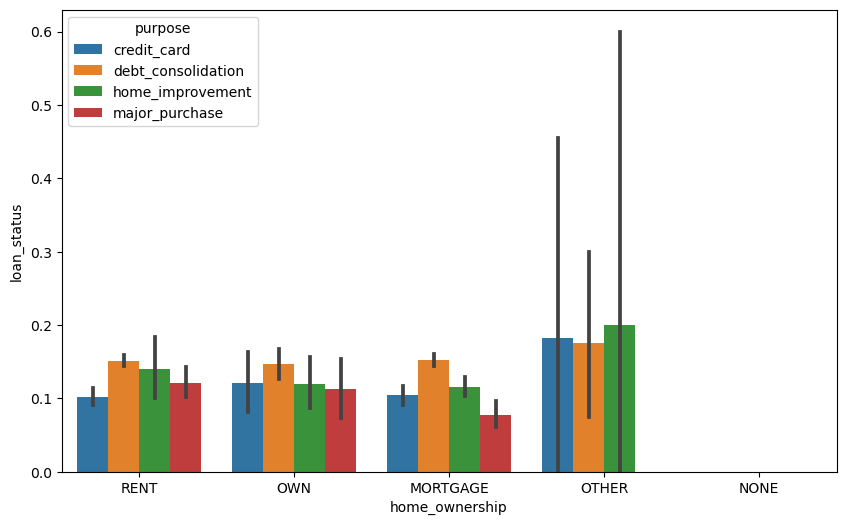

In [149]:
# home ownership
plot_segmented('home_ownership')

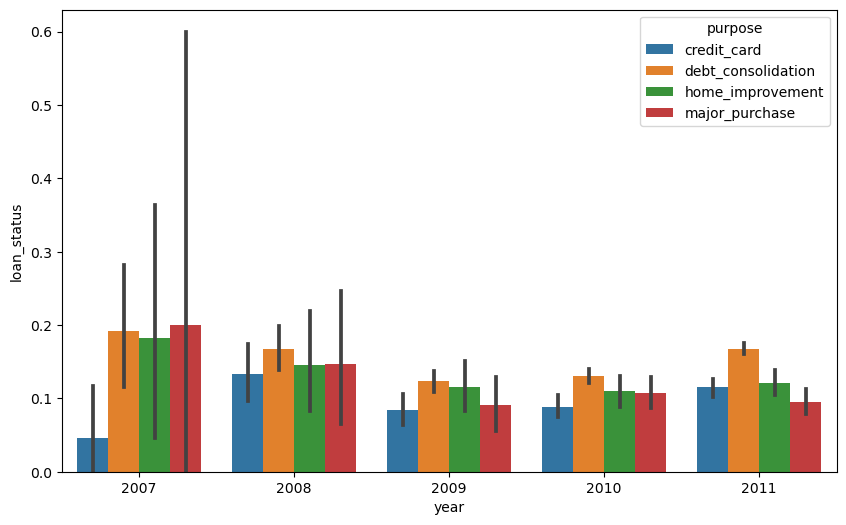

In [150]:
# year
plot_segmented('year')

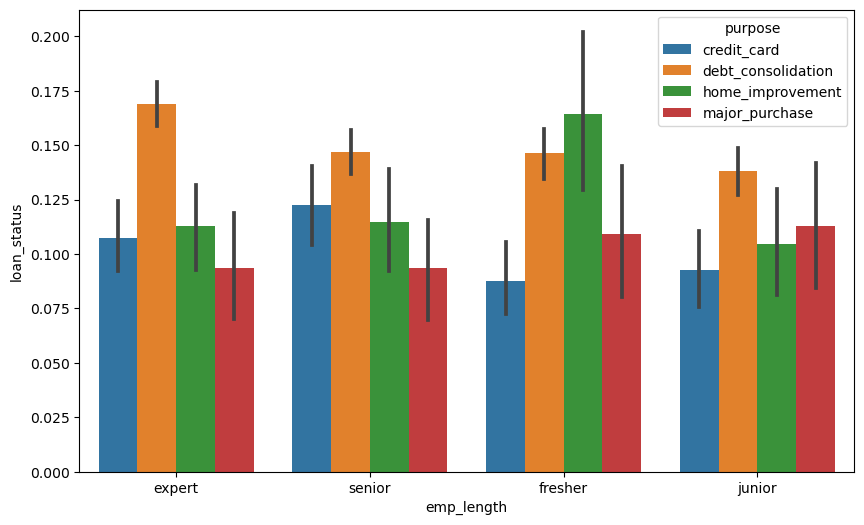

In [151]:
# emp_length
plot_segmented('emp_length')

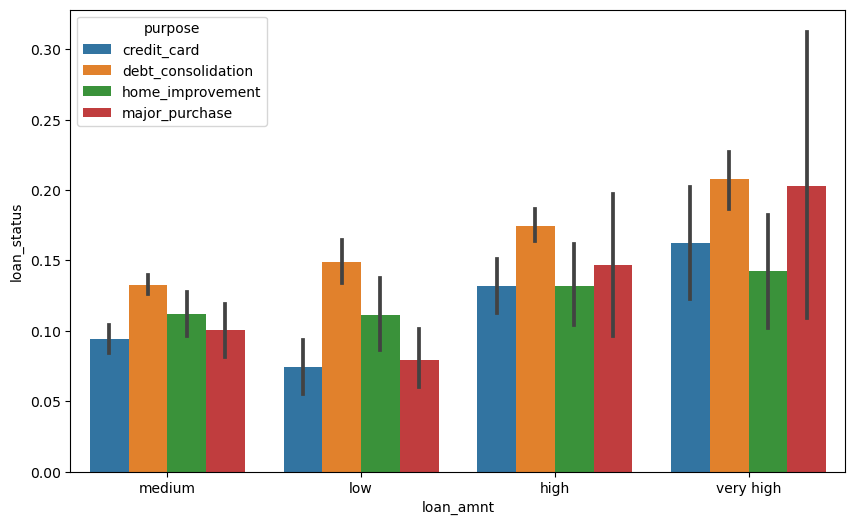

In [152]:
# loan_amnt: same trend across loan purposes
plot_segmented('loan_amnt')

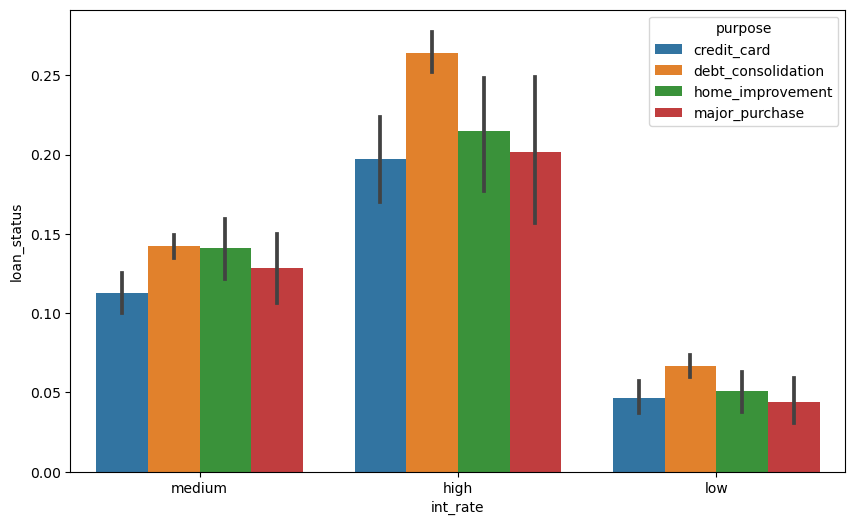

In [153]:
# interest rate
plot_segmented('int_rate')

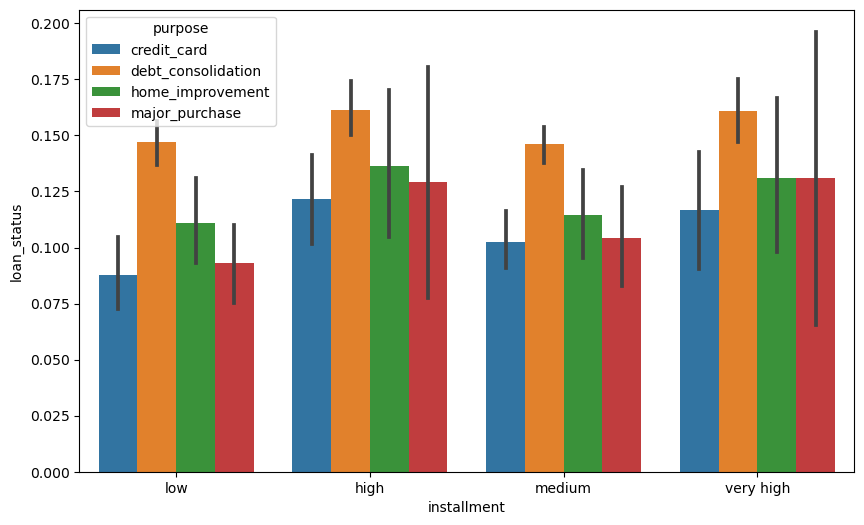

In [154]:
# installment
plot_segmented('installment')

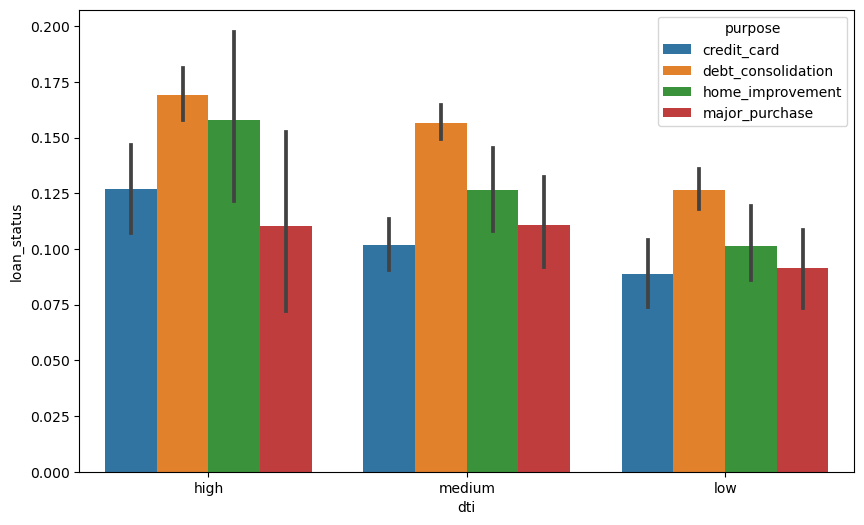

In [155]:
# debt to income ratio
plot_segmented('dti')

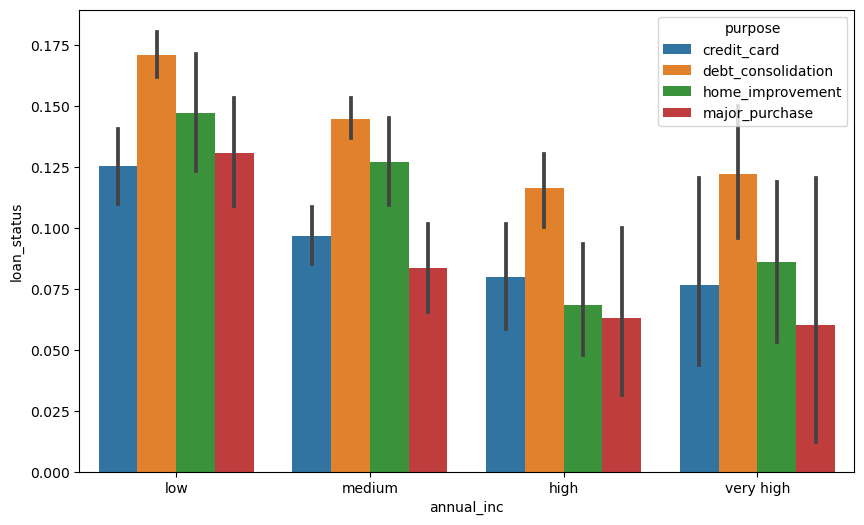

In [156]:
# annual income
plot_segmented('annual_inc')

In [157]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [161]:
# one can write a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [162]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'month', 'year']


In [171]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'purpose': 5.0, 'title': 100.0, 'addr_state': 60.0, 'dti': 5.0}


# Auto EDA

In [151]:
#Auto EDA
!pip install sweetviz


     -------------------------------------- 15.1/15.1 MB 795.4 kB/s eta 0:00:00


NameError: name 'loan' is not defined

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df1 = pd.read_csv('loan.csv', low_memory=False)

In [154]:
import sweetviz as sv
sweet_report = sv.analyze(df1)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

C:\Users\ep494e\Anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\ep494e\Anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\ep494e\Anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
C:\Users\ep494e\Anaconda3\lib\site-packages\sweetviz\series_analyzer.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [162]:
!pip install pandas_profiling

In [165]:
import pandas as pd
from pandas_profiling import ProfileReport
design_report = ProfileReport(df1)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]